# Отток клиентов банка

## Содержание исследования <a id='content'> </a>

* [1. Цель исследования и план работы](#purpose)  
* [2. Подготовка данных](#data_preparation)  
    * [2.1. Обзор данных](#data_overview)  
         - [2.1.1. Выводы](#conclusions_2_1_1)  
    * [2.2. Предобработка данных](#data_preprocessing)  
         - [2.2.1. Изменение названий столбцов](#column_names_change)  
         - [2.2.2. Обработка пропусков](#gaps)  
         - [2.2.3. Обработка дубликатов](#duplicates)  
         - [2.2.4. Обработка аномальных значений](#anomalies)  
         - [2.2.5. Выводы](#conclusions_2_2_5)  
    * [2.3. Подготовка признаков](#features_preparation)  
         - [2.3.1. Выводы](#conclusions_2_3_1)  
* [3. Исследование задачи](#problem_research)  
    * [3.1. Исследование дисбаланса классов](#imbalance_research)  
    * [3.2. Обучение модели без учёта дисбаланса](#train_imbalanced)   
         - [3.2.1. Модель логистической регрессии](#imbalanced_LR)  
         - [3.2.2. Модель случайного леса](#imbalanced_RF)  
    * [3.3. Выводы](#conclusions_3_3)  
* [4. Борьба с дисбалансом](#fighting_imbalance)  
    * [4.1. Автоматическая балансировка](#auto_balance)  
         - [4.1.1. Модель логистической регрессии](#auto_balance_LR)  
         - [4.1.2. Модель случайного леса](#auto_balance_RF)  
    * [4.2. Увеличение выбоки (upsampling)](#upsampling)  
         - [4.2.1. Модель логистической регрессии](#upsampled_LR)  
         - [4.2.2. Модель случайного леса](#upsampled_RF)  
    * [4.3. Уменьшение выбоки (downsampling)](#downsampling)  
         - [4.3.1. Модель логистической регрессии](#downsampled_LR)  
         - [4.3.2. Модель случайного леса](#downsampled_RF)  
    * [4.4. Выводы](#conclusions_4_4)  
* [5. Тестирование модели](#final_testing)  
* [6. Итоги исследования и общий вывод](#research_results)

## 1. Цель исследования и план работы <a id='purpose'> </a>

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

**Задача**  

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Необходимо построить модель с предельно большим значением *F1*-меры не менее 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

*Признаки* 

- `RowNumber` — индекс строки в данных  
- `CustomerId` — уникальный идентификатор клиента  
- `Surname` — фамилия  
- `CreditScore` — кредитный рейтинг  
- `Geography` — страна проживания  
- `Gender` — пол  
- `Age` — возраст  
- `Tenure` — сколько лет человек является клиентом банка  
- `Balance` — баланс на счёте  
- `NumOfProducts` — количество продуктов банка, используемых клиентом  
- `HasCrCard` — наличие кредитной карты  
- `IsActiveMember` — активность клиента  
- `EstimatedSalary` — предполагаемая зарплата  

*Целевой признак*  

- `Exited` — факт ухода клиента  

**План работы**

Данная работа состоит из следующих этапов:  
1) Подготовка данных:  
- загрузим и подготовим данные;  
- поясним порядок действий.  

2) Исследование задачи:  
- исследуем баланс классов;
- обучим модель без учёта дисбаланса;
- кратко опишем выводы.  

3) Борьба с дисбалансом:  
- улучшим качество модели, учитывая дисбаланс классов;  
- обучим разные модели и найдём лучшую;  
- кратко опишем выводы.  

4) Тестирование модели:  
- проведем финальное тестирование;    

5) Итоги исследования и общий вывод.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

## 2. Подготовка данных <a id='data_preparation'> </a>

### 2.1. Обзор данных <a id='data_overview'> </a>

Импортируем все необходимые библиотеки для проведения исследования.

In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn.csv')
df.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      2.0       0.00              1          1               1   
1      1.0   83807.86              1          0               1   
2      8.0  159660.80              3          1               0   
3      1.0       0.00              2          0               0   
4      2.0  125510.82              1          1               1   
5      8.0  113755.78              2          1               0   
6      7.0       0.00              2          1               1   
7      4.0  115046.74              4          1               0   
8      4.0  142051.07              2          0               1   
9      2.0  134603.88              1          1               1   
10     6.0  102016.72              2          0               0   
11     3.0       0.00              2          1               0   
12    10.0       0.00              2          1               0   
13     5.0       0.00              2          0               0   
14     7.0       0.00              2          1               1   
15     3.0  143129.41              2          0               1   
16     1.0  132602.88              1          1               0   
17     9.0       0.00              2          1               1   
18     6.0       0.00              1          0               0   
19     6.0       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

Выведем на экран общую информацию о датафрейме.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### 2.1.1. Выводы <a id='conclusions_2_1_1'> </a>

Из общих данных можно сделать следующие выводы:  
1) в таблице 10000 строк и 14 столбцов;  
2) названия столбцов имеют заглавные буквы и записаны в одно слово - требуется привести названия всех столбцов к нижнему регистру и "змеиному" формату;  
3) в столбце `Tenure` присутствуют пропуски;  
4) изменение типов данных столбцов не требуется;  
5) в датасете шесть категориальных признаков, включая целевой признак: `Surname`, `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `Exited`. Остальные признаки количественные.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 2.2. Предобработка данных <a id='data_preprocessing'> </a>

#### 2.2.1. Изменение названий столбцов <a id='column_names_change'> </a>

Приведем названия всех столбцов к нижнему регистру и "змеиному" формату.

In [4]:
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

#### 2.2.2. Обработка пропусков <a id='gaps'> </a>

Визуализируем количество порпусков по столбцам.

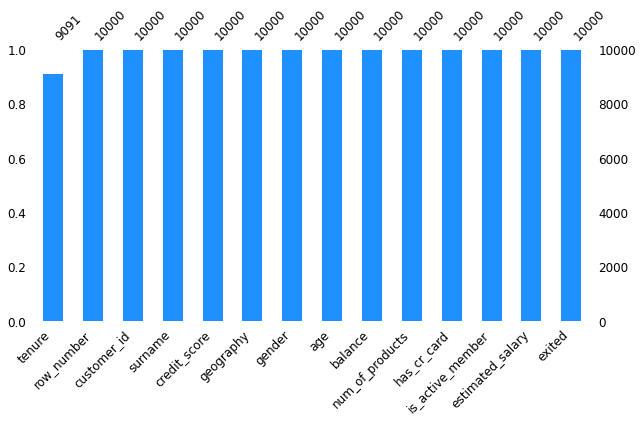

In [5]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

В столбце `tenure` 909 пропущенных значений. Посмотрим несколько строк с пропусками в этом столбце и все уникальные значения столбца.

In [6]:
df.query('tenure.isna()').head()

row_number  customer_id    surname  credit_score geography  gender  age  \
30          31     15589475    Azikiwe           591     Spain  Female   39   
48          49     15766205        Yin           550   Germany    Male   38   
51          52     15768193  Trevisani           585   Germany    Male   36   
53          54     15702298   Parkhill           655   Germany    Male   41   
60          61     15651280     Hunter           742   Germany    Male   35   

    tenure    balance  num_of_products  has_cr_card  is_active_member  \
30     NaN       0.00                3            1                 0   
48     NaN  103391.38                1            0                 1   
51     NaN  146050.97                2            0                 0   
53     NaN  125561.97                1            0                 0   
60     NaN  136857.00                1            0                 0   

    estimated_salary  exited  
30         140469.38       1  
48          90878.13       0  
51          86424.57       0  
53         164040.94       1  
60          84509.57       0

In [7]:
sorted(df['tenure'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

Диапазон значений `tenure` - сколько лет человек является клиентом банка - от 0 до 10 лет.  
Пропущенные значения не представляется возможным заполнить.  
Этот признак является важным для построения модели, поэтому строки с отсутсвтующими значениями необходимо удалить.  
Причинами пропусков могут быть: ошибка в формуле, если значение рассчитывается автоматически, или необязательность заолнения формы, если сколько лет человек является клиентом банка указывается вручную. Рекомендуется провести расследование причин появления пропусков.

Удалим строки с пропущенными значениями и снова проверим датафрейм на пропуски.

In [8]:
df = df.dropna()
df.shape

(9091, 14)

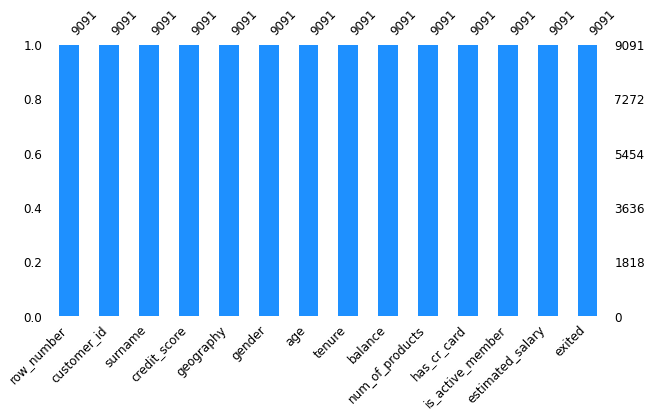

In [9]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

**Результат:**  из датафрейма было удалено 909 строк с пропусками в столбце `tenure`.

#### 2.2.3. Обработка дубликатов <a id='duplicates'> </a>

Проверим датафрейм на дубликаты строк.

In [10]:
print(f'В таблице {df.duplicated().sum()} дубликатов строк.')

В таблице 0 дубликатов строк.


Проверим столбец `surname` на наличие неявных дубликатов.

In [11]:
df['surname'].value_counts()

Smith       30
Martin      27
Scott       26
Walker      25
Yeh         25
            ..
Henty        1
Trejo        1
Jensen       1
Wagner       1
Hendrick     1
Name: surname, Length: 2787, dtype: int64

В столбце `surname` 2787 уникальных фамилий. Повторяющиеся фамилии - это нормально.

Проверим столбец `gender` на наличие неявных дубликатов.

In [12]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Всё корректно: два пола - мужской и женский.

Проверим столбец `geography` на наличие неявных дубликатов.

In [13]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

География не очень широкая. В датасете представлены клиенты банка только из трёх стран: Франция, Испания и Германия.

**Результат:** в исходной таблице нет дубликатов строк и неявных дубликатов значений в столбцах.

#### 2.2.4. Обработка аномальных значений <a id='anomalies'> </a>

Рассмотрим характерные значения числовых наборов данных в столбцах датасета.

In [14]:
df.describe().round(2)

row_number  customer_id  credit_score      age   tenure    balance  \
count     9091.00      9091.00       9091.00  9091.00  9091.00    9091.00   
mean      5013.91  15691053.16        650.74    38.95     5.00   76522.74   
std       2884.43     71614.19         96.41    10.56     2.89   62329.53   
min          1.00  15565701.00        350.00    18.00     0.00       0.00   
25%       2521.50  15628985.50        584.00    32.00     2.00       0.00   
50%       5019.00  15691061.00        652.00    37.00     5.00   97318.25   
75%       7511.50  15752851.50        717.00    44.00     7.00  127561.89   
max       9999.00  15815660.00        850.00    92.00    10.00  250898.09   

       num_of_products  has_cr_card  is_active_member  estimated_salary  \
count          9091.00      9091.00           9091.00           9091.00   
mean              1.53         0.70              0.52         100181.21   
std               0.58         0.46              0.50          57624.76   
min               1.00         0.00              0.00             11.58   
25%               1.00         0.00              0.00          51227.74   
50%               1.00         1.00              1.00         100240.20   
75%               2.00         1.00              1.00         149567.21   
max               4.00         1.00              1.00         199992.48   

       exited  
count  9091.0  
mean      0.2  
std       0.4  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       1.0

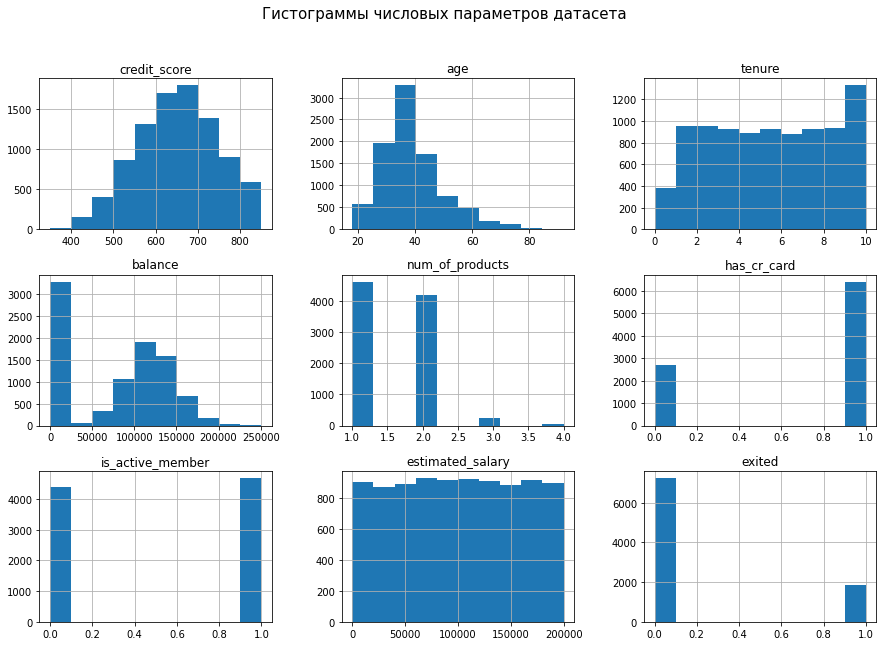

In [15]:
df[['credit_score', 'age', 'tenure', 
    'balance', 'num_of_products', 'has_cr_card', 
    'is_active_member', 'estimated_salary', 'exited']].hist(figsize=(15, 10));
plt.suptitle("Гистограммы числовых параметров датасета", fontsize=15);

- столбцы `row_number` и `customer_id` нам не интересны для анализа;  
- столбец `credit_score`: диапазон значений от 350 до 850, медиана почти равна среднему - выбросов нет;  
- столбец `age`: диапазон возрастов клиентов от 18 до 92 лет, большинство клиентов банка в возрасте от 35 до 40 лет, медиана почти равна среднему - выбросов нет;  
- столбец `tenure`: объекты являются клиентами банка от 0 до 10 лет, причем 10 лет - наибольшая категория клиентов, а 0 лет - наименьшая, медиана равна среднему - выбросов нет;  
- столбец `balance`: диапазон значений от 0 до 250898.09, медиана больше среднего - более 3000 клиентов имеют нулевой баланс на счёту;  
- столбец `num_of_products`: диапазон значений от 1 до 4, аномалий нет.
- столбцы `has_cr_card`, `is_active_member`, `exited`: бинарные категориальные признаки, принимают значения 0 или 1, аномалий нет;  
- столбец `estimated_salary`: диапазон значений от 11.58 до 199992.48, медиана почти равна среднему - выбросов нет;  
- столбцы `surname`, `gender` и `geography` мы рассмотрели на шаге обработки дубликатов. Аномальных значений в них не содержится.

In [16]:
print('Количество клиентов с нулевым балансом на счёту:', len(df.query('balance == 0')))

Количество клиентов с нулевым балансом на счёту: 3283


**Результат:**  
1) выявлено, что 3283 клиента имеют нулевой баланс на счёте (значение 0 в столбце `balance`) - это 36% датасета;  
2) в остальных столбцах датафрейма нет аномальных значений.

#### 2.2.5. Выводы <a id='conclusions_2_2_5'> </a>

В результате предобработки данных были внесены следующие изменения в исходный датасет:  
1) название всех столбцов приведено к нижнему регистру и "змеиному" формату;  
2) удалено 909 строк с пропусками в столбце `tenure` ;  

Так же было выявлено, что 3283 клиента имеют нулевой баланс на счёте (значение 0 в столбце `balance`) - это 36% датасета.   

Необходимо обратить внимание на отсутствие данных в столбце `tenure` в 909 строках и выявить причины.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 2.3. Подготовка признаков <a id='features_preparation'> </a>

Признаки `row_number`, `customer_id`, `surname` не несут никакой пользы для обучения модели и решения задачи классификации, поэтому перезапишем наш датафрейм в переменную `df_1` без этих столбцов.

In [17]:
df_1 = df.drop(['row_number', 'customer_id', 'surname'], axis=1)
df_1.shape

(9091, 11)

Преобразуем категориальные признаки в численные техникой прямого кодирования OHE, так как она подходит для всех моделей.

In [18]:
# укажем параметр drop_first=True, чтобы избежать дамми-ловушки
df_1_ohe = pd.get_dummies(df_1, columns=['geography', 'gender'], drop_first=True)
df_1_ohe.dtypes

credit_score           int64
age                    int64
tenure               float64
balance              float64
num_of_products        int64
has_cr_card            int64
is_active_member       int64
estimated_salary     float64
exited                 int64
geography_Germany      uint8
geography_Spain        uint8
gender_Male            uint8
dtype: object

Видим, что категориальные признаки `geography` и `gender` были преобразованы, причём первые колонки (`geography_France` и `gender_Female`) были удалены, чтобы избежать дамми-ловушки.

Запишем признаки в переменную `features`, а целевой признак в переменную `target`.

In [19]:
features = df_1_ohe.drop('exited', axis=1)
target = df_1_ohe['exited']

Разделим выборку на обучающую, валидационную и тестовую (для финального тестирования) выборки в соотношении 60%, 20% и 20% соответственно.

In [20]:
# Чтобы количество классов в наборах данных было равномерно распределено, укажем параметр stratify=target.
features_train, features_other, target_train, target_other = train_test_split(features, target, 
                                                                              test_size=0.4, random_state=12345, 
                                                                              stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other, 
                                                                              test_size=0.5, random_state=12345, 
                                                                              stratify=target_other)

#построим таблицу с размерностями обучающей и валидационной выборок и долями от исходных данных
pd.DataFrame({'Размерность выборки': [features_train.shape, features_valid.shape, features_test.shape],
             'Доля от исходных данных': [round(len(features_train.index) / len(features.index), 2), 
                                         round(len(features_valid.index) / len(features.index), 2),
                                         round(len(features_test.index) / len(features.index), 2)]}, 
             index=['features_train', 'features_valid', 'features_test'])

Размерность выборки  Доля от исходных данных
features_train          (5454, 11)                      0.6
features_valid          (1818, 11)                      0.2
features_test           (1819, 11)                      0.2

Проведем масштабирование признаков методом стандартизации данных.

In [21]:
# создадим список численных признаков для масштабирования
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# создадим объект структуры данных StandardScaler
scaler = StandardScaler()

# настроим объект структуры данных StandardScaler на обучающих данных
scaler.fit(features_train[numeric])

# преобразуем обучающую, валидационную и тестовую выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head())
features_train.shape

credit_score       age    tenure   balance  num_of_products  \
9723     -1.292898 -0.660843  0.686341  0.786636        -0.910943   
1224     -1.563714  0.778434  1.034232  0.833795        -0.910943   
8377      1.581914  0.106771 -0.357331 -1.222967         0.789359   
8014      0.842379  0.010820 -1.053112  0.807063        -0.910943   
2491     -0.397123 -1.236554 -0.357331 -1.222967         0.789359   

      has_cr_card  is_active_member  estimated_salary  geography_Germany  \
9723            0                 0         -0.223548                  0   
1224            1                 0          1.383021                  0   
8377            1                 1         -0.308331                  0   
8014            1                 1         -0.430980                  0   
2491            1                 1          1.392642                  0   

      geography_Spain  gender_Male  
9723                0            1  
1224                1            0  
8377                1            1  
8014                1            0  
2491                1            0

(5454, 11)

#### 2.3.1. Выводы <a id='conclusions_2_3_1'> </a>

Данные были подготовлены для дальнейшего исследования следующим образом:  
1) удалены бесполезные признаки: `row_number`, `customer_id`, `surname` ;  
2) категориальные признаки `geography` и `gender` были преобразованы в численные техникой OHE;  
3) исходные данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 60% 20% и 20% соответственно со стратификацией (равномерное распределение) классов целевого признака;  
4) проведено масштабирование численных признаков `credit_score`, `age`, `tenure`, `balance`, `num_of_products`, `estimated_salary` методом стандартизации данных.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

## 3. Исследование задачи <a id='problem_research'> </a>

### 3.1. Исследование дисбаланса классов <a id='imbalance_research'> </a>

Рассмотрим как распределены классы целевого признака в исходных данных.

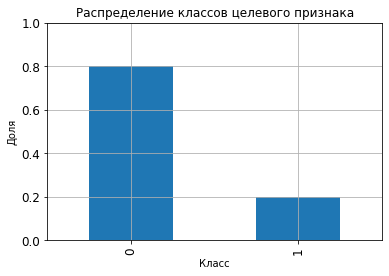

In [22]:
df_1['exited'].value_counts(normalize=True).round(2).plot.bar(ylim=(0, 1), 
                                                              grid=True, 
                                                              title='Распределение классов целевого признака', 
                                                              xlabel='Класс', ylabel='Доля', fontsize=12);

**Вывод:**  
Наблюдается дисбаланс классов целевого признака в исходном датасете.  
Соотношение классов: класс "0" - 80%, класс "1" - 20%.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 3.2. Обучение модели без учёта дисбаланса <a id='train_imbalanced'> </a>

Обучим модели логистической регрессии и случайного леса без учёта дисбаланса классов и зафиксируем метрики. Создадим таблицу results, в которой будем хранить метрики моделей.

In [23]:
results = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC_ROC'])

#### 3.2.1. Модель логистической регрессии <a id='imbalanced_LR'> </a>

Напишем функцию `get_LR_metrics`, которая будет принимать на вход модель логистической регрессии, обучающую и тестовую выборки, название столбца с метрикой и возвращать столбец с метриками. 
<div> <p id='LR_function'></p> </div>

In [24]:
def get_LR_metrics(model, features_train, target_train, features_valid, target_valid, column_name):
    global results
    # обучаем модель на обучающей выборке
    model.fit(features_train, target_train)
    # получаем предсказания модели на валидационной выборке
    predictions_valid = model.predict(features_valid)
    # получим вероятности отрицательных и положительных классов
    probabilities_valid = model.predict_proba(features_valid)
    # сохраним вероятности положительного класса в отдельной переменной
    probabilities_one_valid = probabilities_valid[:, 1]
    # сохраним метрики модели в таблицу results, округлим их до двух знаков после запятой и вернём столбец с метриками
    results[column_name] = [accuracy_score(target_valid, predictions_valid), 
                            recall_score(target_valid, predictions_valid), 
                            precision_score(target_valid, predictions_valid), 
                            f1_score(target_valid, predictions_valid),
                            roc_auc_score(target_valid, probabilities_one_valid)]
    results[column_name] = results[column_name].round(2)
    return results[column_name]

Обучим модель логистической регрессии без учёта дисбаланса классов и выведем метрики модели на экран.

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear')
get_LR_metrics(model, features_train, target_train, features_valid, target_valid, 'imbalanced_LR')
results

imbalanced_LR
Accuracy            0.82
Recall              0.22
Precision           0.63
F1                  0.33
AUC_ROC             0.79

**Вывод:**  метрика F1 модели логистической регресси ниже, чем 0.59.

#### 3.2.2. Модель случайного леса <a id='imbalanced_RF'> </a>

Напишем функцию `get_RF_metrics`, которая с помощью GridSearchCV обучит модели случайного леса с гиперпараметрами `n_estimators` в диапазоне от 10 до 100 с шагом 10 и `max_depth` в диапазоне от 1 до 15 и найдёт модель с наилучшей метрикой F1, её гиперпараметры и метрики, и добавит метрики в таблицу `results` для сравнения с метриками модели логистической регрессии.
<div> <p id='RF_function'></p> </div>

In [26]:
def get_RF_metrics(model, features_train, target_train, column_name):
    global results
    # сохраним гиперпараметры, которые хотим проверить
    parameters = {'n_estimators': range (10, 110, 10),
                  'max_depth': range (1, 16, 1)}
    # сохраним метрики, которые хотим посчитать
    scoring = {'Accuracy': 'accuracy', 'Recall': 'recall', 'Precision': 'precision', 'F1': 'f1', 'AUC': 'roc_auc'}
    # запустим GridSearch, укажем параметр refit='F1', чтобы оценщик искал модель с наилучшей метрикой F1
    grid = GridSearchCV(model, parameters, scoring=scoring, refit='F1')
    grid.fit(features_train, target_train)
    # выведем на экран гиперпараметры наилучшей модели
    best_param = grid.best_params_
    print('Гиперпараметры наилучшей модели:', grid.best_params_)
    # добавим метрики лучшей модели случайного леса в таблицу results, округлим их до двух знаков после запятой и выведем на экран
    results[column_name] = [grid.cv_results_['mean_test_Accuracy'][grid.best_index_], 
                            grid.cv_results_['mean_test_Recall'][grid.best_index_], 
                            grid.cv_results_['mean_test_Precision'][grid.best_index_], 
                            grid.best_score_, 
                            grid.cv_results_['mean_test_AUC'][grid.best_index_]]
    results[column_name] = results[column_name].round(2)
    return results[column_name]

In [27]:
%%time
model = RandomForestClassifier(random_state=12345)
get_RF_metrics(model, features_train, target_train, 'imbalanced_RF')
results

Гиперпараметры наилучшей модели: {'max_depth': 12, 'n_estimators': 100}
CPU times: total: 4min 9s
Wall time: 4min 10s


imbalanced_LR  imbalanced_RF
Accuracy            0.82           0.86
Recall              0.22           0.45
Precision           0.63           0.78
F1                  0.33           0.57
AUC_ROC             0.79           0.85

**Вывод:**  метрики F1 и AUC_ROC наилучшей модели случайного леса выше, чем модели логистической регрессии, но метрика F1 всё ещё ниже, чем 0.59.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 3.3. Выводы <a id='conclusions_3_3'> </a>

Визуализируем полученные метрики моделей логистической регрессии и случайного леса без учёта дисбаланса классов.

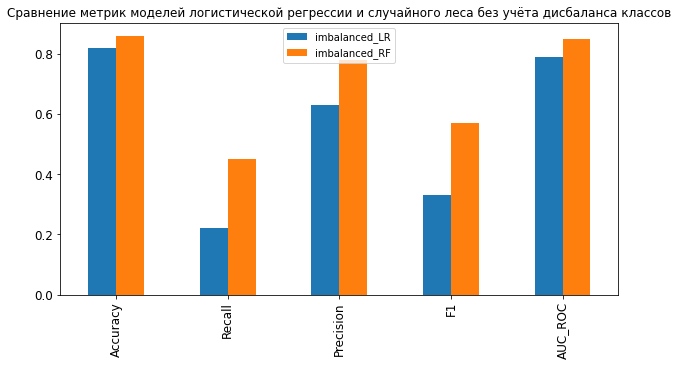

In [28]:
results.plot.bar(figsize=(10, 5), fontsize=12,
                title='Сравнение метрик моделей логистической регрессии и случайного леса без учёта дисбаланса классов');

Все метрики модели случайного леса лучше метрик модели логистической регрессии, но желаемый показатель метрики F1 >= 0.59 пока не достигнут.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

## 4. Борьба с дисбалансом <a id='fighting_imbalance'> </a>

Рассмотрим, как на результаты модели влияет устранение дисбаланса разными методами: автоматической балансировкой, увеличением или уменьшением класса.

### 4.1. Автоматическая балансировка <a id='auto_balance'> </a>

#### 4.1.1. Модель логистической регрессии <a id='auto_balance_LR'> </a>

Обучим модель логистической регрессии с автоматической балансировкой классов с помощью параметра `class_weight`=’balanced’ и выведем метрики модели на валидационной выборке на экран.

In [29]:
# инициализируем модель логистической регрессии с параметром class_weight=’balanced’
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
# получим метрики модели с помощью функции get_LR_metrics
get_LR_metrics(model, features_train, target_train, features_valid, target_valid, 'class_weight_LR')
# выведем на экран метрики моделей логистической регресии без учёта дисбаланса и с автоматической балансировкой классов
results[['imbalanced_LR', 'class_weight_LR']]

imbalanced_LR  class_weight_LR
Accuracy            0.82             0.71
Recall              0.22             0.73
Precision           0.63             0.39
F1                  0.33             0.51
AUC_ROC             0.79             0.79

**Вывод:** метрика F1 модели логистической регрессии на валидационной выборке улучшились по сравнению с моделью без учета дисбаланса классов, метрика AUC_ROC не изменилась.

#### 4.1.2. Модель случайного леса <a id='auto_balance_RF'> </a>

Обучим модели случайного леса с автоматической балансировкой классов с помощью параметра `class_weight`=’balanced’, найдём наилучшую модель с метрикой F1 с помощью GridSearchCV и выведем метрики модели на экран.

In [30]:
%%time
# инициализируем модель случайного леса с параметром class_weight=’balanced’
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
# получим метрики наилучшей моднли с помощью функции get_RF_metrics
get_RF_metrics(model, features_train, target_train, 'class_weight_RF')
# выведем на экран метрики моделей случайного леса без учёта дисбаланса и с автоматической балансировкой классов
results[['imbalanced_RF', 'class_weight_RF']]

Гиперпараметры наилучшей модели: {'max_depth': 8, 'n_estimators': 70}
CPU times: total: 3min 50s
Wall time: 3min 52s


imbalanced_RF  class_weight_RF
Accuracy            0.86             0.83
Recall              0.45             0.66
Precision           0.78             0.57
F1                  0.57             0.61
AUC_ROC             0.85             0.85

**Вывод:** метрика F1 модели случайного леса улучшились по сравнению с моделью без учета дисбаланса классов, метрика AUC_ROC не изменилась.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 4.2. Увеличение выбоки (upsampling) <a id='upsampling'> </a>

Сделаем объекты редкого класса "1" (факт ухода клиента) не такими редкими, увеличив их количество в 4 раза.  
Напишем функцию `upsample`, которая разделяет положительные и отрицательные классы, копирует положительные классы, создаёт новую выборку и перемешивает её.

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Получим увеличенную обучающую выборку и проверим сбалансированность классов целевого признака.

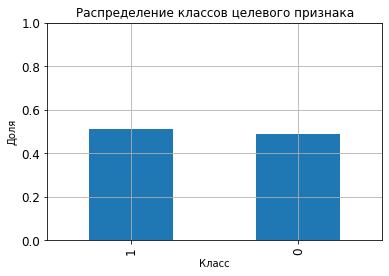

In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts(normalize=True).round(2).plot.bar(ylim=(0, 1), grid=True, 
                                                                title='Распределение классов целевого признака', 
                                                                xlabel='Класс', ylabel='Доля', fontsize=12);

Теперь классы сбалансированы.

#### 4.2.1. Модель логистической регрессии <a id='upsampled_LR'> </a>

Обучим модель логистической регрессии на увеличенной обучающей выборке и выведем метрики модели на валидационной выборке на экран.

In [33]:
model = LogisticRegression(random_state=12345, solver='liblinear')
get_LR_metrics(model, features_upsampled, target_upsampled, features_valid, target_valid, 'upsampled_LR')
# выведем на экран метрики моделей логистической регресии без учёта дисбаланса, c автоматической балансировкой классов 
# и увеличенной обучающей выборкой
results[['imbalanced_LR', 'class_weight_LR', 'upsampled_LR']]

imbalanced_LR  class_weight_LR  upsampled_LR
Accuracy            0.82             0.71          0.71
Recall              0.22             0.73          0.74
Precision           0.63             0.39          0.38
F1                  0.33             0.51          0.51
AUC_ROC             0.79             0.79          0.79

**Вывод:** метрики F1 и AUC_ROC не изменились по сравнению c автоматической балансировкой классов.

#### 4.2.2. Модель случайного леса <a id='upsampled_RF'> </a>

Обучим модели случайного леса на увеличенной (сбалансированной) выборке, найдём наилучшую модель с метрикой F1 с помощью GridSearchCV и выведем метрики модели на экран.

In [34]:
%%time
model = RandomForestClassifier(random_state=12345)
get_RF_metrics(model, features_upsampled, target_upsampled, 'upsampled_RF')
# выведем на экран метрики моделей случайного леса без учёта дисбаланса и с автоматической балансировкой классов
results[['imbalanced_RF', 'class_weight_RF', 'upsampled_RF']]

Гиперпараметры наилучшей модели: {'max_depth': 15, 'n_estimators': 70}
CPU times: total: 4min 59s
Wall time: 5min 1s


imbalanced_RF  class_weight_RF  upsampled_RF
Accuracy            0.86             0.83          0.95
Recall              0.45             0.66          1.00
Precision           0.78             0.57          0.91
F1                  0.57             0.61          0.95
AUC_ROC             0.85             0.85          0.99

Результаты метрик очень высокие, скорее всего модель переобучена. Посмортим метрики этой модели на обучающей выборке.

In [35]:
model = RandomForestClassifier(n_estimators=70, max_depth=15, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions_train = model.predict(features_upsampled)
pd.DataFrame({'metrics_train': [accuracy_score(target_upsampled, predictions_train), 
                                recall_score(target_upsampled, predictions_train), 
                                precision_score(target_upsampled, predictions_train), 
                                f1_score(target_upsampled, predictions_train)]}, 
             index=['Accuracy', 'Recall', 'Precision', 'F1'])

metrics_train
Accuracy        0.997383
Recall          1.000000
Precision       0.994856
F1              0.997421

**Вывод:** метрики F1 и AUC_ROC для модели, обученной на upsampled обучающих данных, намного выше, чем для автоматической балансировки. Скорее всего модель переобучена и выучила все ответы на обучающей выборке.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 4.3. Уменьшение выбоки (downsampling) <a id='downsampling'> </a>

Сделаем объекты частого класса "0" не такими частыми.  
Напишем функцию `downsample`, которая разделитт положительные и отрицательные классы, случайным образом отбросит часть из отрицательных объектов, создаст новую обучающую выборку и перемешает данные.

In [36]:
def downsample(features, target, fraction):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Получим уменьшенную обучающую выборку и проверим сбалансированность классов целевого признака.

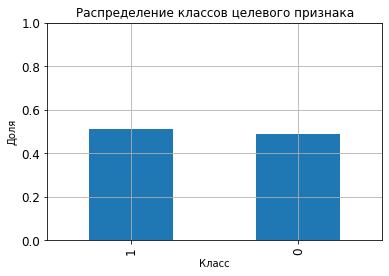

In [37]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
target_downsampled.value_counts(normalize=True).round(2).plot.bar(ylim=(0, 1), 
                                                                  grid=True, 
                                                                  title='Распределение классов целевого признака', 
                                                                  xlabel='Класс', ylabel='Доля', fontsize=12);

Классы сбалансированы.

#### 4.3.1. Модель логистической регрессии <a id='downsampled_LR'> </a>

Обучим модель логистической регрессии на уменьшенной сбалансированной обучающей выборке и выведем метрики модели на валидационной выборке на экран.

In [38]:
model = LogisticRegression(random_state=12345, solver='liblinear')
get_LR_metrics(model, features_downsampled, target_downsampled, features_valid, target_valid, 'downsampled_LR')
# выведем на экран метрики моделей логистической регресии без учёта дисбаланса, c автоматической балансировкой классов, 
# увеличенной и уменьшенной обучающей выборкой
results[['imbalanced_LR', 'class_weight_LR', 'upsampled_LR', 'downsampled_LR']]

imbalanced_LR  class_weight_LR  upsampled_LR  downsampled_LR
Accuracy            0.82             0.71          0.71            0.71
Recall              0.22             0.73          0.74            0.75
Precision           0.63             0.39          0.38            0.39
F1                  0.33             0.51          0.51            0.51
AUC_ROC             0.79             0.79          0.79            0.79

**Вывод:** метрики F1 и AUC_ROC не изменились по сравнению c автоматической балансировкой классов и увеличенной выборкой.

#### 4.3.2. Модель случайного леса <a id='downsampled_RF'> </a>

Обучим модели случайного леса на уменьшенной (сбалансированной) выборке, найдём наилучшую модель с метрикой F1 с помощью GridSearchCV и выведем метрики модели на экран.

In [39]:
%%time
model = RandomForestClassifier(random_state=12345)
get_RF_metrics(model, features_downsampled, target_downsampled, 'downsampled_RF')
# выведем на экран метрики моделей случайного леса без учёта дисбаланса и с автоматической балансировкой классов
results[['imbalanced_RF', 'class_weight_RF', 'upsampled_RF', 'downsampled_RF']]

Гиперпараметры наилучшей модели: {'max_depth': 9, 'n_estimators': 80}
CPU times: total: 2min 24s
Wall time: 2min 25s


imbalanced_RF  class_weight_RF  upsampled_RF  downsampled_RF
Accuracy            0.86             0.83          0.95            0.78
Recall              0.45             0.66          1.00            0.76
Precision           0.78             0.57          0.91            0.79
F1                  0.57             0.61          0.95            0.78
AUC_ROC             0.85             0.85          0.99            0.85

**Вывод:** метод уменьшения выборки дал высокое значение метрики F1 по сравнению с автоматической балансировкой классов. AUC_ROC не изменились по сравнению c автоматической балансировкой классов и моделью без учёта дисбаланса.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

### 4.4. Выводы <a id='conclusions_4_4'> </a>

Визуализируем значения метрик F1 и AUC_ROC разных моделей и выберем наилучшую модель.

In [40]:
results

imbalanced_LR  imbalanced_RF  class_weight_LR  class_weight_RF  \
Accuracy            0.82           0.86             0.71             0.83   
Recall              0.22           0.45             0.73             0.66   
Precision           0.63           0.78             0.39             0.57   
F1                  0.33           0.57             0.51             0.61   
AUC_ROC             0.79           0.85             0.79             0.85   

           upsampled_LR  upsampled_RF  downsampled_LR  downsampled_RF  
Accuracy           0.71          0.95            0.71            0.78  
Recall             0.74          1.00            0.75            0.76  
Precision          0.38          0.91            0.39            0.79  
F1                 0.51          0.95            0.51            0.78  
AUC_ROC            0.79          0.99            0.79            0.85

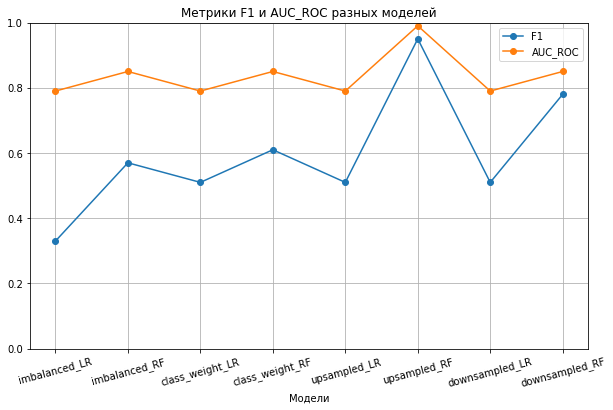

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim([0, 1])
ax.set_title('Метрики F1 и AUC_ROC разных моделей')
ax.set_xlabel('Модели')
plt.xticks(rotation=15)
ax.plot(results.loc['F1'], marker='o', label='F1')
ax.plot(results.loc['AUC_ROC'], marker='o', label='AUC_ROC');
ax.legend()
ax.grid()

Наилучшую метрику F1 показала модель случайного леса на сбалансрованной по классам выборке техникой увеличения выборки.  
Метрика AUC_ROC зависит только от алгоритма (LR или RF) и не зависит от сбалансированности классов, за исключением модели случайного леса, обученной на увеличенной выборке.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

## 5. Тестирование модели <a id='final_testing'> </a>

Проведем финальное тестирование наилучшей модели на тестовой выборке.

Увеличим обучающую выборку за счёт добавления к ней валидационной выборки и избавимся от дисбаланса классов методом upsamplig.

In [42]:
features_train = pd.concat([features_train] + [features_valid])
target_train = pd.concat([target_train] + [target_valid])
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Дообучим наилучшую модель на новой обучающей выборке и получим предсказания модели на тестовой выборке.

In [43]:
# инициализируем модель случайного леса с гиперпараметрами, найденными с помощью GridSearchCV
model = RandomForestClassifier(n_estimators=70, 
                               max_depth=15, 
                               random_state=12345)
# обучим модель на обучающих данных, сбалансированных по классам техникой upsampling
model.fit(features_upsampled, target_upsampled)
# получим предсказания модели на тестовой выборке
predictions_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
# запишем метрики в таблицу в столбец downsampled_RF_test
results['upsampled_RF_test'] = [accuracy_score(target_test, predictions_test), 
                                  recall_score(target_test, predictions_test), 
                                  precision_score(target_test, predictions_test), 
                                  f1_score(target_test, predictions_test),
                                  roc_auc_score(target_test, probabilities_one_test)]
results['upsampled_RF_test'] = results['upsampled_RF_test'].round(2)
results[['upsampled_RF_test']]

upsampled_RF_test
Accuracy                0.85
Recall                  0.59
Precision               0.65
F1                      0.62
AUC_ROC                 0.84

**Результат:**  метрика F1 наилучшей модели на тестовой выборке выше, чем 0.59.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>

## 6. Итоги исследования и общий вывод <a id='research_results'> </a>

В данной работе были исследованы модели, способные проанализировать поведение клиентов банка на имеющихся данных и спрогнозировать, уйдёт клиент из банка или нет, то есть решить задачу классификации.  
Исходные данные были изучены, целевой признак: факт ухода клиента (ушёл — 1, не ушёл — 0).  
В результате предобработки данных:  

1) название всех столбцов приведено к нижнему регистру и "змеиному" формату;
2) удалено 909 строк с пропусками в столбце `tenure` ;
3) было выявлено, что 3283 клиента имеют нулевой баланс на счёте (значение 0 в столбце balance) - это 36% датасета.

Признаки были подготовлены для дальнейшего исследования следующим образом:

1) удалены бесполезные признаки: `row_number`, `customer_id`, `surname` ;  
2) категориальные признаки `geography` и `gender` были преобразованы в численные техникой OHE;  
3) исходные данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 60% 20% и 20% соответственно со стратификацией (равномерное распределение) классов целевого признака;  
4) проведено масштабирование численных признаков `credit_score`, `age`, `tenure`, `balance`, `num_of_products`, `estimated_salary` методом стандартизации данных.

Был исследован дисбаланс классов целевого признака: класс "0" - 80%, класс "1" - 20%.  

Далее были исследованы модели логистической регресии и случайного леса без учёта дисбаланса класса. Наилучшая модель случайного леса показала более высокую метрику F1, чем модель логистической регресии, но желаемого значения F1 >= 0.59 достичь не удалось.  

Далее были применены три метода устранения дисбаланса: автоматическая балансировка, увеличение или уменьшение класса, и исследовано их вляиние на метрики F1 и AUC_ROC моделей.

Для модели логистической регрессии можно сделать вывод, что устранение дисбаланса увеличивает метрику F1. Выбор метода устранения не вляиет на метрику F1: она одинакова для все трёх методов. Метрика AUC_ROC не зависит от дисбаланса классов.

In [44]:
results[['imbalanced_LR', 'class_weight_LR', 'upsampled_LR', 'downsampled_LR']]

imbalanced_LR  class_weight_LR  upsampled_LR  downsampled_LR
Accuracy            0.82             0.71          0.71            0.71
Recall              0.22             0.73          0.74            0.75
Precision           0.63             0.39          0.38            0.39
F1                  0.33             0.51          0.51            0.51
AUC_ROC             0.79             0.79          0.79            0.79

Для модели случайного леса можно сделать вывод, что устранение дисбаланса увеличивает метрику F1. Наилучший результат показал метод увеличения выборки (upsampling), второй результат - метод уменьшения выборки (downsampling), затем - автоматическая балансировка. Метрика AUC_ROC не зависит от дисбаланса классов, и отличается только для переобученной модели.

In [45]:
results[['imbalanced_RF', 'class_weight_RF', 'upsampled_RF', 'downsampled_RF']]

imbalanced_RF  class_weight_RF  upsampled_RF  downsampled_RF
Accuracy            0.86             0.83          0.95            0.78
Recall              0.45             0.66          1.00            0.76
Precision           0.78             0.57          0.91            0.79
F1                  0.57             0.61          0.95            0.78
AUC_ROC             0.85             0.85          0.99            0.85

Наилучшей по метрике F1 была признана модель случайного леса, обученная на увеличенной сбалансированной выборке. Данная модель была протестирована на тестовой выборке и получен результат метрики F1 выше, чем 0.59.

In [46]:
results[['upsampled_RF_test']]

upsampled_RF_test
Accuracy                0.85
Recall                  0.59
Precision               0.65
F1                      0.62
AUC_ROC                 0.84

***Рекомендация:*** обратить внимание на отсутствие данных в столбце `tenure` в 909 строках и выявить причины.  

<div>
    <br/>
    <a href=#content>К содержанию</a>
</div>